In [1]:
from IPython.display import HTML
css_file = './custom.css'
HTML(open(css_file, "r").read())

In [2]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

#Adaption of James Loy's code for a single Node 
class Node:
    def __init__(self, x, y, l=0.1):
        self.input  = x
        self.weight = np.random.rand() 
        self.bias   = np.random.rand()                 
        self.y      = y
        self.output = np.zeros(y.shape)
        self.learning_rate = l
    
    def feedforward(self):
        #Equal to predicting
        self.output = np.dot(self.input.T, self.weight) + self.bias
        
        # Loss function
        self.J = (np.sum((self.y - self.output.T) ** 2)) / len(self.input)
    
    def backprop(self):
        # Then we want the partial derivative regarding weight and bias of this loss 
        weight_deriv = (np.sum(-2 * self.input * (self.y - self.output.T))) / len(self.input) 
        bias_deriv = (np.sum(-2 * (self.y - self.output.T))) / len(self.input)
        
        # update the weights with the derivative (slope) of the loss function
        self.weight -= weight_deriv * self.learning_rate
        self.bias -= bias_deriv * self.learning_rate

    def train(self, n):
        self.t_weights = []
        self.t_biases = []
        self.t_losses = []
        for i in range(n):    
            nn.feedforward()
            self.t_weights.append(nn.weight)
            self.t_biases.append(nn.bias)
            self.t_losses.append(nn.J)
            #print(f'Weight: {nn.weight} Bias: {nn.bias} Cost: {nn.J}')    
            nn.backprop()
        self.t_weights.append(nn.weight)
        self.t_biases.append(nn.bias)
        self.t_losses.append(nn.J)

In [3]:
# Create regression data
X, y, coef = make_regression(n_samples=20, n_features=1, noise=10, coef = True)
#Include bias
intercept = np.random.randint(-50, 50)
y += intercept
y = y.reshape(len(y),1)

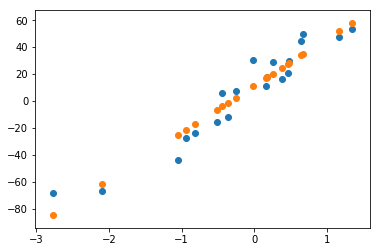

In [4]:
nn = Node(X,y, 0.2)
nn.train(200)
    

# Plot predicitons
fig = plt.figure()
y_pred = nn.output.T
plt.scatter(X,y)
plt.scatter(X,y_pred)
plt.show()

<IPython.core.display.Javascript object>


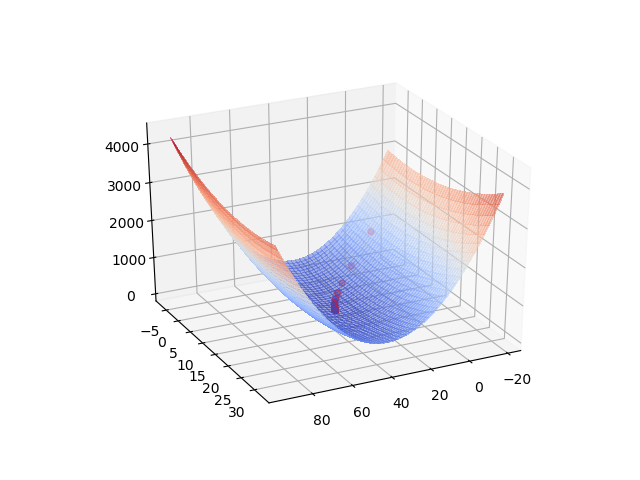

In [5]:
# Plot Loss surface:
def loss_plot(nn):
    weights = np.linspace(coef - 1.5 * coef, coef + 1.5 * coef, 100)
    biases = np.linspace(intercept - 1.5 * intercept, intercept + 1.5 * intercept , 100)
    ww, bb = np.meshgrid(weights, biases)
    
    #Evaluate function at each point
    losses = []
    for bias in biases:
        for weight in weights:
            pred = np.dot(X.T, weight) + bias
            loss = (np.sum((y - pred.T) ** 2)) / len(X)
            losses.append(loss)
    
    losses = np.array(losses).reshape(100, 100)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(ww, bb, losses, linewidth=0, antialiased=False, cmap = cm.coolwarm, alpha = 0.5)
    ax.scatter(nn.t_weights, nn.t_biases, nn.t_losses, c = 'r')
    plt.show()
    return

%matplotlib notebook
loss_plot(nn)